In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = "WELLCOME_APCspend2013_forThinkful.csv"

In [2]:
rawdata = open(data, 'rb').read()
rawdata

b'PMID/PMCID,Publisher,Journal title,Article title,COST (\xa3) charged to Wellcome (inc VAT when charged)\r\nNA,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in subjects at ultra-high risk for psychosis,\xa30.00\r\nPMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-negative bacterial surface using lipopolysaccharides from rough strains of escherichia coli,\xa32381.04\r\n23043264  PMC3506128 ,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related opioids with irreversible ? opioid receptor antagonist effects.",\xa3642.56\r\n23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor agonist activity.,\xa3669.64\r\n23438216 PMC3601604 ,ACS,J Org Chem,Regioselective opening of myo-inositol orthoesters: mechanism and synthetic utility.,\xa3685.88\r\nPMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies of 4-(Thiazol-5-yl)-2-(phenylamino) pyrimidine-5-carbonitrile CDK9 inhibito

In [3]:
codecs = ["ascii", 
          #"cp037",
          #"cp437",
          #"cp500",
          "cp852",
          "cp850",
          "utf_32", "utf_32_be", "utf_32_le", "utf_16", 
          #"utf_16_be", #"utf_16_le" 
          "utf_7", "utf_8", "utf_8_sig"]

for codec in codecs:
    try:
        df = pd.read_csv(data, encoding=codec)
        print(codec)
        break
    except:
        continue

cp852


In [4]:
df = pd.read_csv(data, encoding='cp852', skiprows=1,
                 names=['ID','Publisher', 'Journal Title',
                          'Article Title', 'Cost'],
                dtype={'PMID/PMCID':'object',
                            'Publisher':'category',
                            'Journal title':'category',
                            'Article title':'object',
                            'COST (ú) charged to Wellcome (inc VAT when charged)':'object'})

In [5]:
df.head()

,ID,Publisher,Journal Title,Article Title,Cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,ú0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,ú2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",ú642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,ú669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,ú685.88


In [6]:
df['Cost'] = df['Cost'].str.replace('ú', '')

In [7]:
ready_to_convert = df['Cost'].apply(lambda x:str(x).replace('.','').isdigit()) 
df['Cost'][~ready_to_convert]

178        1674$
179      1375.8$
180        2010$
181     1204.38$
182      1254.6$
183        1476$
337      671.04$
1599       1440$
1600     1460.3$
1601    1476.47$
1602    1570.87$
1603    1600.25$
1604    1600.25$
Name: Cost, dtype: object

In [8]:
df['Cost'] = df['Cost'].str.replace('$', '')

In [9]:
df['Cost'] = pd.to_numeric(df['Cost'])

In [10]:
df['Journal Title'].value_counts()

PLoS One                                                                 92
PLoS ONE                                                                 62
Journal of Biological Chemistry                                          48
Nucleic Acids Research                                                   21
Proceedings of the National Academy of Sciences                          19
Human Molecular Genetics                                                 18
PLoS Neglected Tropical Diseases                                         18
Nature Communications                                                    17
PLoS Pathogens                                                           15
Neuroimage                                                               15
PLoS Genetics                                                            15
NeuroImage                                                               14
PLOS ONE                                                                 14
Brain       

In [11]:
df['Journal Title'] = df['Journal Title'].str.lower().str.strip()

In [12]:
df['Journal Title'].value_counts()

plos one                                                      190
journal of biological chemistry                                53
neuroimage                                                     29
nucleic acids research                                         26
plos pathogens                                                 24
plos genetics                                                  24
proceedings of the national academy of sciences                22
plos neglected tropical diseases                               20
human molecular genetics                                       19
nature communications                                          19
brain                                                          14
bmc public health                                              14
movement disorders                                             13
journal of neuroscience                                        13
developmental cell                                             12
biochemica

In [13]:
df['Journal Title'] = df['Journal Title'].str.replace('pnas', 'proceedings of the national academy of sciences') \
                   .str.replace('plos 1', 'plos one') \
                   .str.replace('plosone', 'plos one') 

In [14]:
freq_journals = df['Journal Title'].value_counts()[(df['Journal Title'].value_counts() >= 5)]
freq_journals

plos one                                                   206
journal of biological chemistry                             53
neuroimage                                                  29
proceedings of the national academy of sciences             28
nucleic acids research                                      26
plos genetics                                               24
plos pathogens                                              24
plos neglected tropical diseases                            20
nature communications                                       19
human molecular genetics                                    19
bmc public health                                           14
brain                                                       14
movement disorders                                          13
journal of neuroscience                                     13
biochemical journal                                         12
developmental cell                                     

The five most common journals are

1. plos one
2. journal of biological chemistry
3. neuroimage
4. proceedings of the national academy of sciences
5. nucleic acids research

In [15]:
df = df.loc[df['Journal Title'].isin(freq_journals.index)]

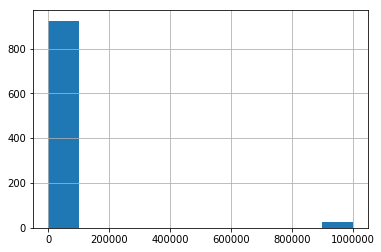

In [16]:
df['Cost'].hist();

In [17]:
df = df[df['Cost'] < 10000]

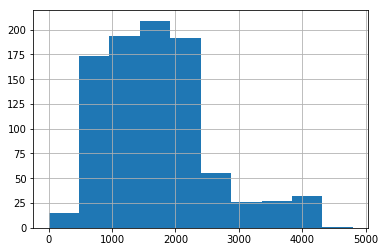

In [18]:
df['Cost'].hist()

The, mean, median, and standard deviation of the article cost by journal is displayed below.

In [19]:
df.groupby('Journal Title')['Cost'].mean().sort_values(ascending=False)

Journal Title
molecular cell                                             3925.736667
structure                                                  3881.824286
cell reports                                               3644.226667
neuron                                                     3565.644444
current biology                                            3511.682727
developmental cell                                         3292.271667
cell                                                       3171.767500
nature communications                                      3134.133333
embo journal                                               3120.000000
journal of visualized experiments                          2919.802000
bmj                                                        2751.000000
neuropsychopharmacology                                    2700.000000
american journal of human genetics                         2684.510000
elsevier                                                   2625

In [20]:
df.groupby('Journal Title')['Cost'].std().sort_values(ascending=False)

Journal Title
cell                                                1271.396468
developmental cell                                  1253.021067
neuron                                              1116.765911
current biology                                     1077.043187
elsevier                                             964.947531
bmj                                                  891.072388
psychological medicine                               889.261941
nature communications                                868.940927
american journal of human genetics                   703.501205
journal of medicinal chemistry                       679.510622
neuropsychopharmacology                              670.820393
preventive medicine                                  651.316407
medical history                                      622.171359
journal of neuroscience                              618.475306
social science and medicine                          600.217876
neuropsychologia          

In [21]:
df.groupby('Journal Title')['Cost'].median().sort_values(ascending=False)

Journal Title
neuron                                                     3918.420
molecular cell                                             3906.430
structure                                                  3895.640
developmental cell                                         3861.420
current biology                                            3857.160
cell reports                                               3836.320
nature communications                                      3642.000
cell                                                       3578.555
embo journal                                               3120.000
neuropsychopharmacology                                    3000.000
bmj                                                        3000.000
journal of visualized experiments                          2711.190
journal of infectious diseases                             2625.600
american journal of human genetics                         2418.340
neurobiology of aging             